In [1]:
import keras

Using TensorFlow backend.


In [5]:
import os

model_dir = r"/media/tim/Data/Work/CBS/Code_hannah/Models/"
xception_path = os.path.join(model_dir, "Final_models/Xception_bs-128_triangular_sz-157_blr-1e-06_mlr-0.0004_e-96_imagenet_All_1-e73")

xception_path, os.path.exists(xception_path)


('/media/tim/Data/Work/CBS/Code_hannah/Models/Final_models/Xception_bs-128_triangular_sz-157_blr-1e-06_mlr-0.0004_e-96_imagenet_All_1-e73',
 True)

In [12]:
from keras.applications import Xception
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

base_model = Xception(False, "imagenet")
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation="relu")(x)
predictions = Dense(1, activation="sigmoid")(x)
model = Model(base_model.input, predictions)




In [13]:
model.load_weights(xception_path)

In [51]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

In [41]:
import os

image_dir = r"/media/tim/Data/Work/CBS/Tiles/Heerlen75x75/"

image_files = [filename for filename in os.listdir(image_dir) if "mask" not in filename and "masked" not in filename and "ir" not in filename]
len(image_files)

175034

In [42]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.xception import preprocess_input

loaded_images = [load_img(os.path.join(image_dir, image)) for index, image in enumerate(image_files)]

#for image in images:
#    image.thumbnail((75,75))
    
images = [preprocess_input(img_to_array(image)) for image in loaded_images]
images[0].shape

(75, 75, 3)

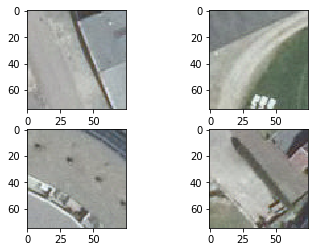

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,2)
ax[0,0].imshow(loaded_images[0])
ax[0,1].imshow(loaded_images[250])
ax[1,0].imshow(loaded_images[500])
ax[1,1].imshow(loaded_images[-1])

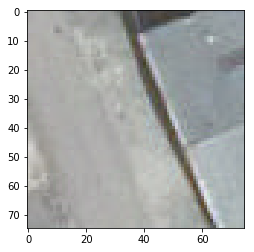

In [44]:
#RGB to BGR
plt.imshow(loaded_images[0])

In [46]:
import numpy as np

predictions = model.predict(np.array(images))

threshold = 0.5
labels = predictions >= threshold

positives = []
negatives = []
for index, label in enumerate(labels):
    if label:
        positives.append(index)
    else:
        negatives.append(index)
    
    

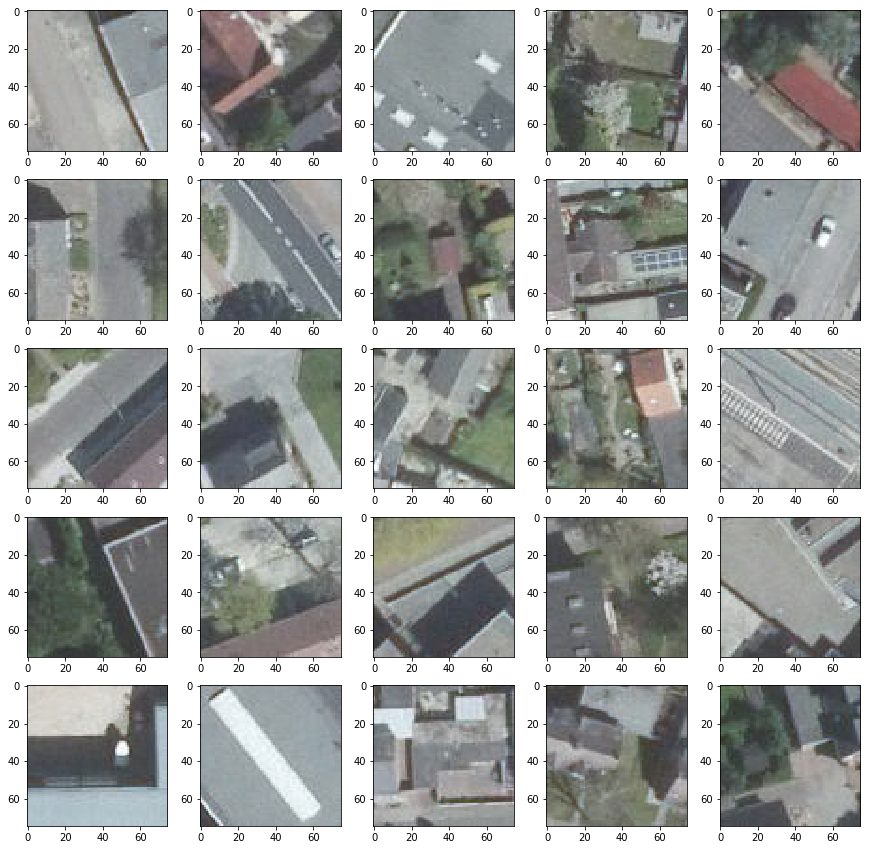

In [59]:
def plot_images(selected_indexes, rows, columns):
    _, ax = plt.subplots(rows,columns, figsize=(15,15))
    i = 0
    for r in range(rows):
        for c in range(columns):
            index = selected_indexes[i]
            ax[r,c].imshow(loaded_images[index])
            i += 1
            
plot_images(positives, 5, 5)

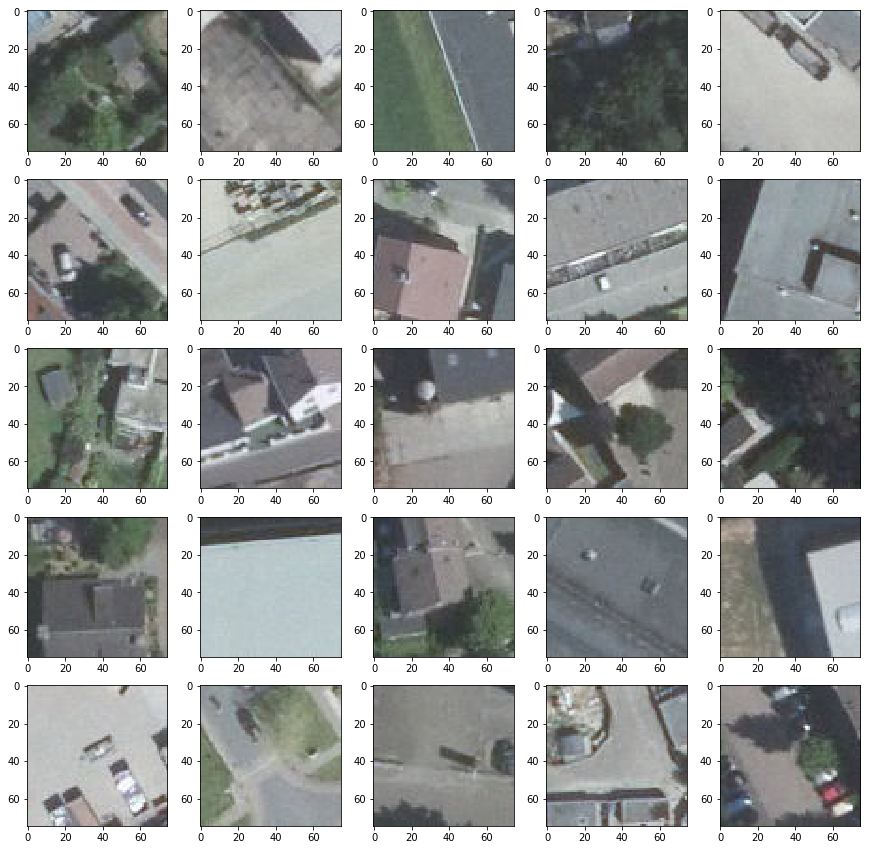

In [60]:
plot_images(negatives, 5, 5)

In [49]:
len(positives), len(negatives)

(84481, 90553)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

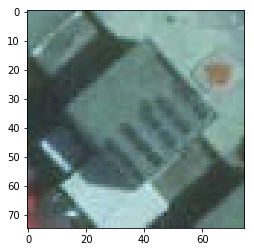

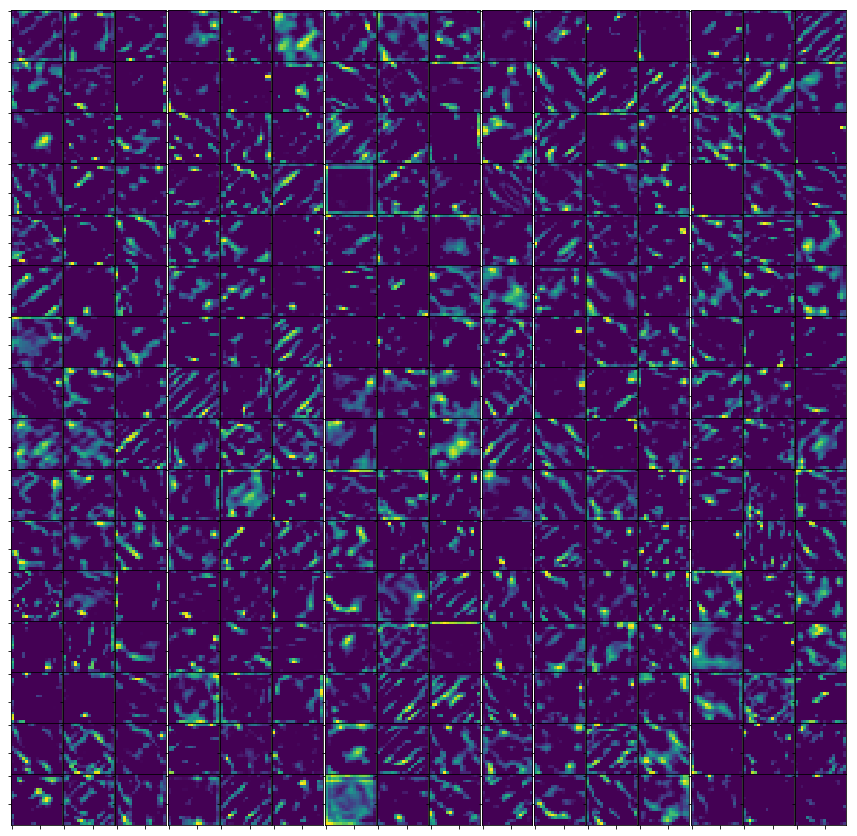

In [11]:
from keras.models import Model

def visualize_layer(output_img,columns=16):
    rows = output_img.shape[2] // columns

    fig, ax = plt.subplots(rows, columns, figsize=(15,15))
    i = 0    
    for r in range(rows):
        for c in range(columns):
            ax[r, c].imshow(output_img[:,:,i])
            ax[r, c].set_xticklabels([])
            ax[r, c].set_yticklabels([])
            i += 1
    plt.subplots_adjust(wspace=0, hspace=0)
    

def model_until_layer(model, layer_name):
    layer = model.get_layer(layer_name)
    base_model = Model(model.input, layer.output)
    base_model.summary()
    return base_model



image = positives[15] 
plt.imshow(image * 255)

base_model = model_until_layer(model, "block3_conv3")
batch_input = np.expand_dims(image, axis=0)
output = base_model.predict(batch_input)
print(output.shape)

output_img = np.squeeze(output, axis=0)
           
visualize_layer(output_img, 16)

In [50]:
import keras.backend as K

layer = model.layers[1]
conv = layer.weights[0]
weights = conv.eval(session=K.get_session())

fig, ax = plt.subplots(8,8, figsize=(15,15))
i = 0
for r in range(8):
    for c in range(8):
        ax[r,c].imshow((weights[:,:,:,i] + 1.0) / 2)
        i += 1

IndexError: index 32 is out of bounds for axis 3 with size 32

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa6acf0d2f0> (for post_execute):


ValueError: Floating point image RGB values must be in the 0..1 range.

ValueError: Floating point image RGB values must be in the 0..1 range.

In [33]:
def evaluate_image(model, image):
    batch_input = image.expand_dims(image, axis=0)
    output = model.predict(batch_input)
    output_img = np.squeeze(output, axis=0)
    return output_img

